In [34]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [15]:
train_data_path=(r"C:\Users\Mayuri\OneDrive\Desktop\DL\flowers\train")
test_data_path=(r"C:\Users\Mayuri\OneDrive\Desktop\DL\flowers\test")

In [16]:
img_size=(224,224)

In [17]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)

In [22]:
train_data=datagen.flow_from_directory(
    os.path.join(train_data_path),
    batch_size=32,
    target_size=img_size,
    class_mode='categorical',
    subset='training',
)

Found 2602 images belonging to 5 classes.


In [25]:
val_data=datagen.flow_from_directory(
    os.path.join(train_data_path),
    batch_size=32,
    target_size=img_size,
    class_mode='categorical',
    subset='validation'
)

Found 648 images belonging to 5 classes.


In [26]:
test_data=datagen.flow_from_directory(
    os.path.join(test_data_path),
    batch_size=32,
    target_size=img_size,
    class_mode='categorical',
    shuffle=False,
)

Found 530 images belonging to 5 classes.


In [29]:
base_model=MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable=False

In [35]:
model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(1024,activation='relu'),
    Dense(train_data.num_classes,activation='softmax')
])

In [36]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
history=model.fit(train_data,epochs=2,validation_data=val_data)

Epoch 1/2


C:\Users\Mayuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6326 - loss: 1.0568 - val_accuracy: 0.8380 - val_loss: 0.4327
Epoch 2/2
82/82 ━━━━━━━━━━━━━━━━━━━━ 57s 692ms/step - accuracy: 0.8458 - loss: 0.4298 - val_accuracy: 0.8642 - val_loss: 0.4240


In [38]:
test_loss,test_acc=model.evaluate(test_data)
print("Val Loss:",test_loss)
print("Val Accuracy:",test_acc)

17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8775 - loss: 0.3661
Val Loss: 0.4021765887737274
Val Accuracy: 0.8679245114326477


In [39]:
from sklearn.metrics import classification_report

In [40]:
predictions=model.predict(test_data)
predicted_classes=np.argmax(predictions,axis=1)
true_classes=test_data.classes
class_names=list(test_data.class_indices.keys())
print(classification_report(true_classes,predicted_classes,target_names=class_names))

17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step 
              precision    recall  f1-score   support

       daisy       0.88      0.82      0.85        72
   dandelion       0.94      0.92      0.93       110
       roses       0.78      0.96      0.86       108
  sunflowers       0.80      0.95      0.87       108
      tulips       0.99      0.70      0.82       132

    accuracy                           0.87       530
   macro avg       0.88      0.87      0.87       530
weighted avg       0.88      0.87      0.87       530



In [47]:
images,true_labels=next(test_data)
predicted_labels=np.argmax(model.predict(images),axis=1)
if true_labels.ndim > 1:  # Check if one-hot encoded
    true_labels = np.argmax(true_labels, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


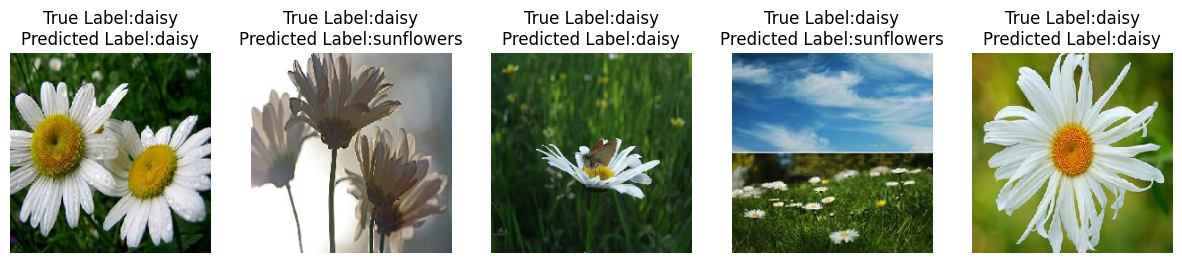

In [48]:
plt.figure(figsize=(15,6))
n=5
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"True Label:{class_names[true_labels[i]]}\nPredicted Label:{class_names[predicted_labels[i]]}")
plt.show()